In [3]:
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_error_and_accuracy 
from script_figure import plot_time_vs_key
from _helper._load_csv import aggreagate_csv_from_cluster
from script_figure import plot_trajectory
from simulation_models import lorenz
import os
from script_figure import labels_plot
import script_figure.helper_figure as hf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import importlib

ut.set_favorite_plot_config()
aggreagate_csv_from_cluster(select_file="lorenz", path=os.path.abspath('') + "/csv")
model_class = lorenz.Lorenz

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

[Errno 2] No such file or directory: 'lorenz_critical_constant_noise_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lorenz_critical_constant_noise_n.pkl'
{'dt': 0.0001, 'time': 50, 'base_infered': [3, 5, 7, 9, 11, 17, 22], 'real_base': [3, 5, 7, 9, 11, 17, 22], 'error': 1.0, 'method': 'Real_model_Ito_A_True_diffusion_Constant', 'type_D': 'constant', 'D_strength': 100, 'experimental_noise': 0, 'ratio_error_real_model': 1.0, 'predictive_error': 0.003271921900051517, 'ratio_error_real_model_predictive': 1.0, 'SBR_finds_real_model': False, 'real_model_on_pareto_front': False, 'SBR_found_better_minimum': False, 'init_params': {'r': 28.0, 'b': 2.3333333333333335, 's': 10.0, 'diffusion_constant': True, 'kwargs': {'diffusion_strength': 100, 'dt': 0.0001, 'n': 50000000}}, 'time_to_compute': 0.0, 'TP': 1.0, 'FP': 0.0, 'FN': 0.0, 'Exact_model_found': 1, 'Accuracy_model': 1.0, 'SBR_pareto_found': False}
reduce the number of points
3 0.2 {}
[Errno 2] No such file or di

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


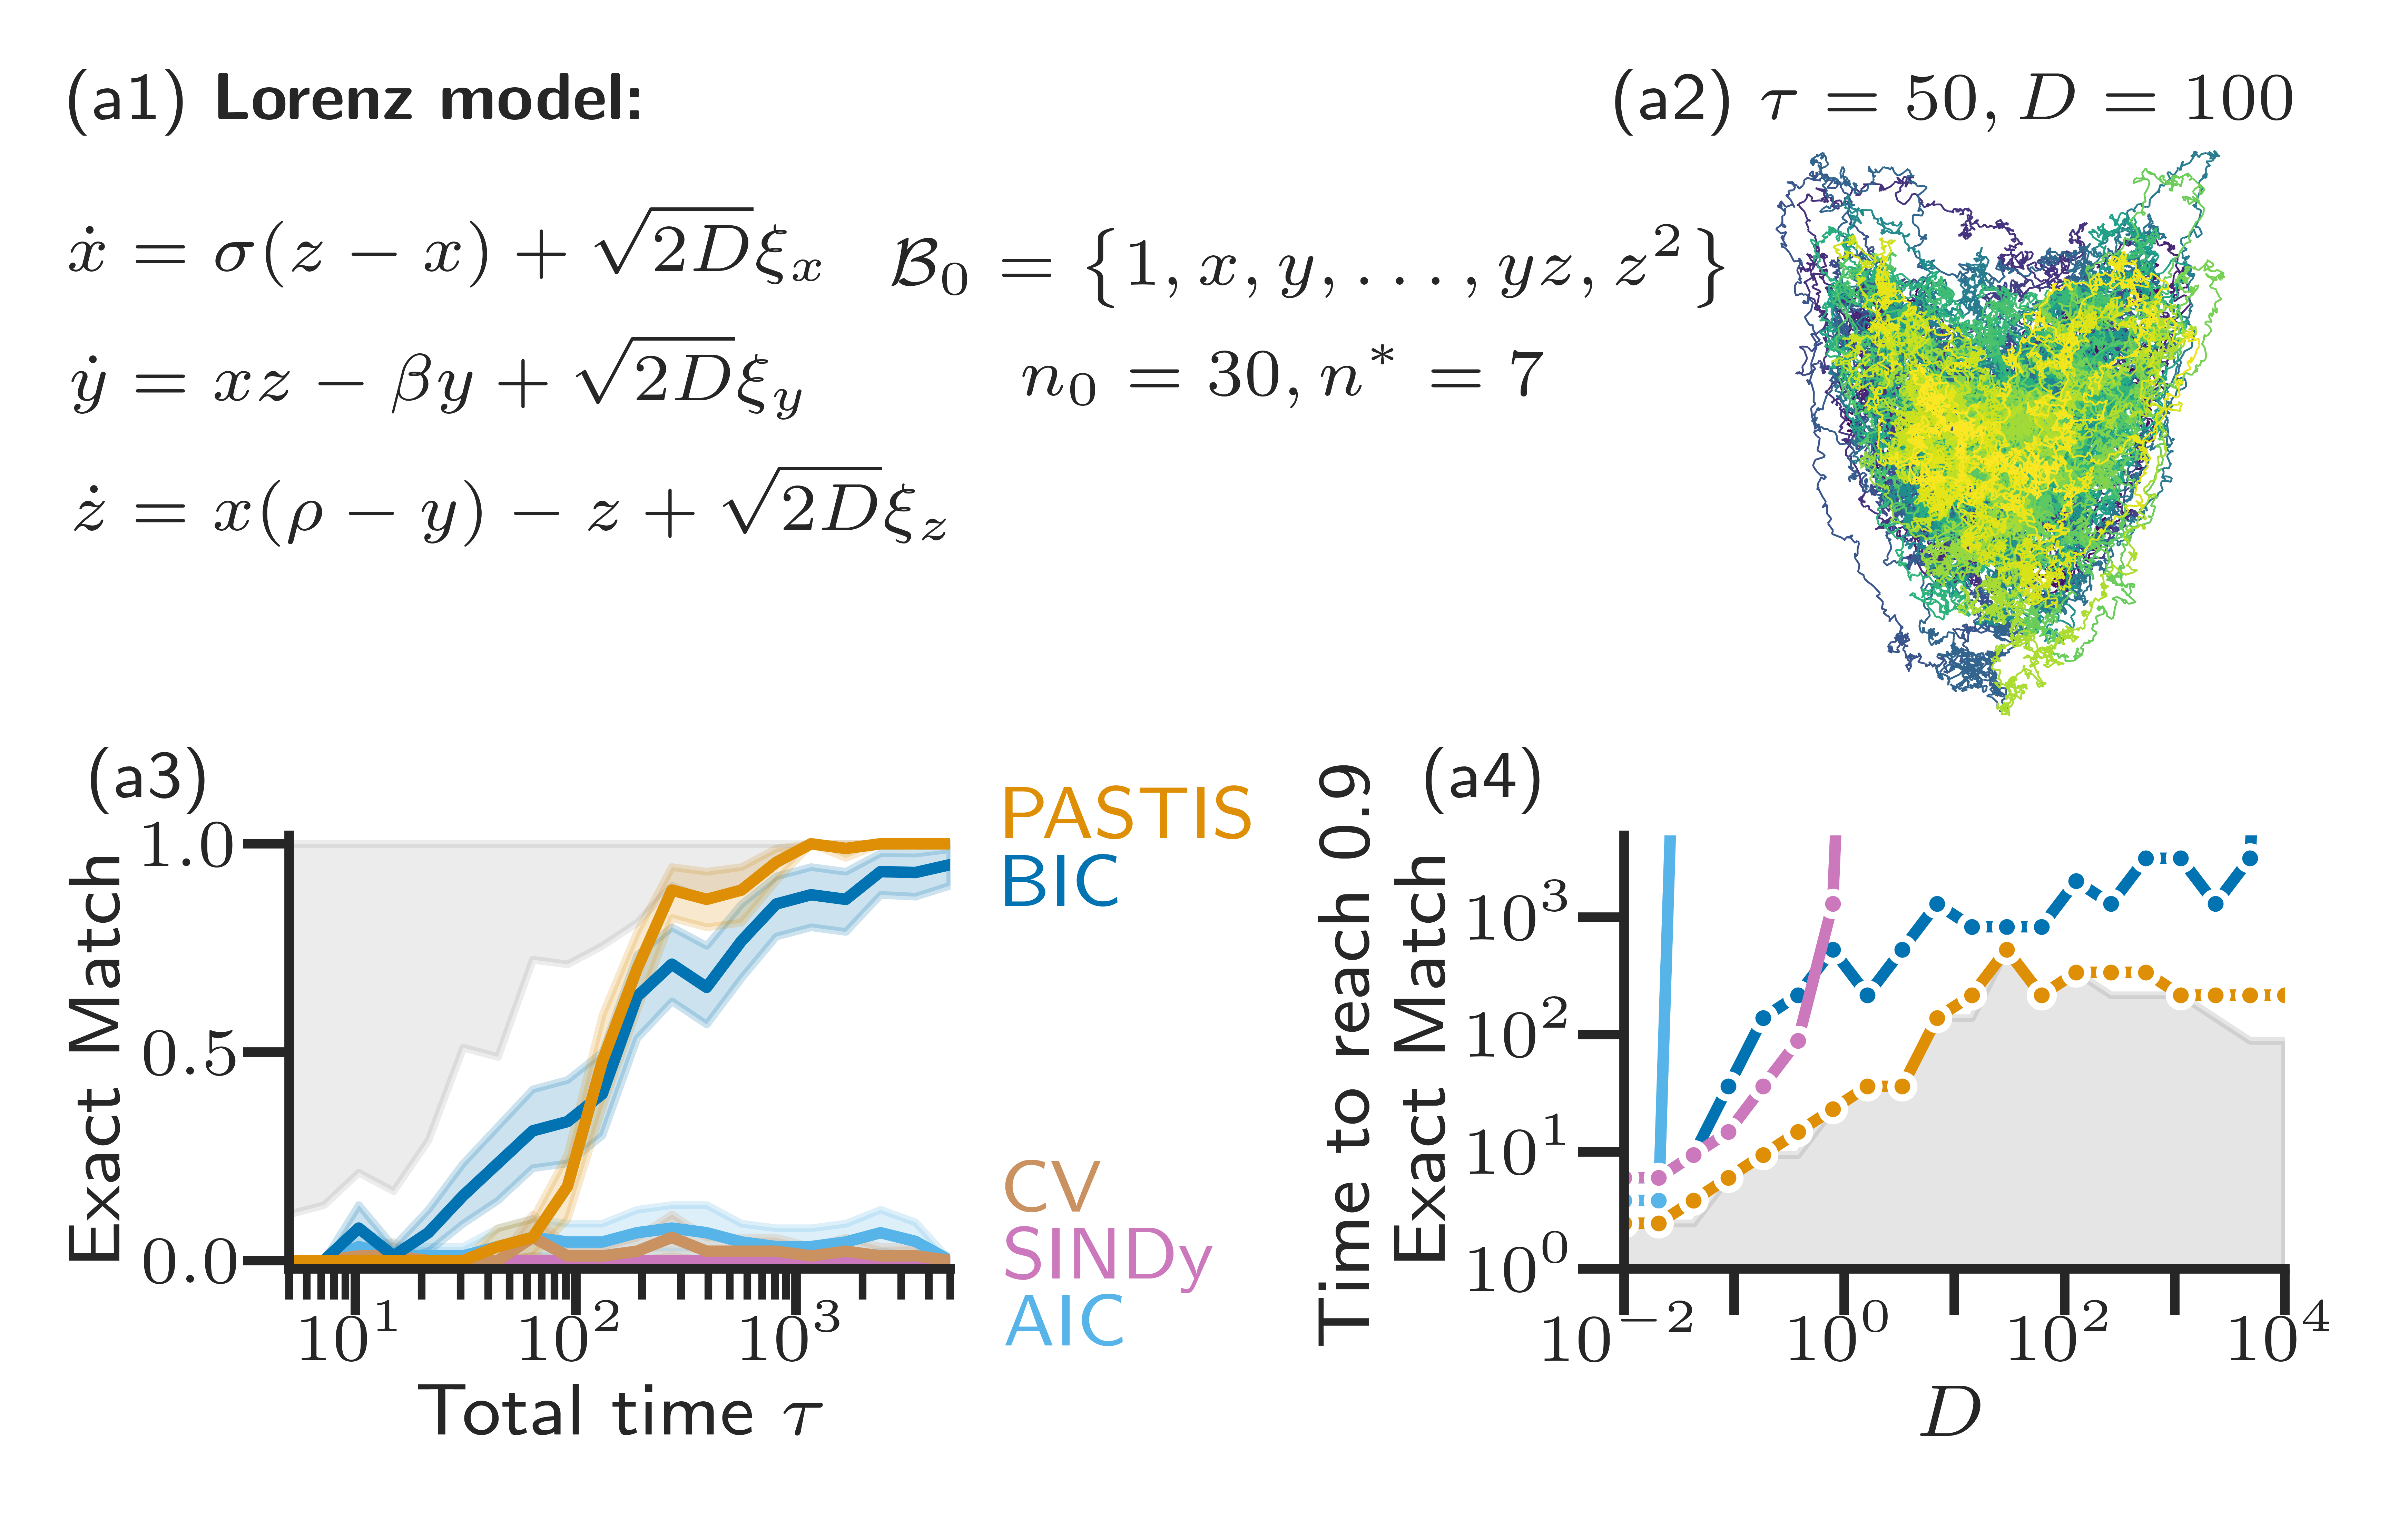

In [4]:
importlib.reload(plot_time_vs_key)
from matplotlib import ticker as mticker
ut.set_favorite_plot_config()
# import pylustrator
# pylustrator.start()

def plot_equation_lorenz(ax = None):
  # Create a figure and axis
  if ax is None:
    fig, ax = plt.subplots()
  ax.axis('off')
  equation = r'''
  \begin{align*} \dot{x} &= \sigma (z - x) + \sqrt{2 D} \xi_x \\  \dot{y} &= x z - \beta y + \sqrt{2 D} \xi_y \\ \dot{z} &= x (\rho - y) - z + \sqrt{2 D} \xi_z \end{align*}
  '''
  out = ax.text(0, 1, equation, fontsize=7, ha='left', va='top', in_layout=False)
  return ax

def plot_base(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.axis('off')
    #equation = r"""$$\begin{aligned} \mathcal{B}_0/x &= \left\{x, \dots, z^2\right\} \\ &\ldots \\ \mathcal{B}_0/z &= \left\{x, \dots, z^2\right\}\end{aligned}$$"""
    equation = r"$\mathcal{B}_0 = \left\{1, x, y, \dots, yz, z^2\right\}$"
    out = ax.text(0.35, 0.85, equation, fontsize=7, ha='left', va='top', in_layout=False)
    equation = r"$n_0 = 30, n^* = 7$" 
    out = ax.text(0.6, 0.65, equation, fontsize=7, ha='left', va='top', in_layout=False)
    return ax

name_csv_base = "lorenz_critical_constant_noise"
name_csv_D_strength = name_csv_base + "_diffusion_strength.pkl"
name_csv_time = name_csv_base + "_n.pkl"
method_to_plot = ["AIC",  "BIC", "SINDy", #r"$\text{PASTIS}_p$",
                  "CV",  "PASTIS", 
                  ]
  
l_y_plot = ["Exact_model_found"]

fig = plt.figure(figsize=ut.set_size(width="article", subplots=(1, 1), fraction=1), layout='constrained')
gs = gridspec.GridSpec(2, 1, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0,:])
gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,:])
ax_latex_1 = plt.subplot(gs00[0])
ax_latex_2 = plt.subplot(gs00[1])
ax_latex_3 = plt.subplot(gs00[-2:])
ax_figure_time =  plt.subplot(gs01[0])
ax_figure_D = plt.subplot(gs01[1])

plot_equation_lorenz(ax_latex_1)
plot_base(ax_latex_2)
plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_time, model_class, ax=ax_latex_3, parameter="time", parameters_value_plot=[50], add_title=False, width=0.2)
ax_latex_3.set_xlim(-50.59, 10.21)

plot_error_and_accuracy.plot_from_csv(name_csv_time, 
                                  parameter="time",
                                  method_to_plot=method_to_plot,
                                  l_y_plot=["Exact_model_found"],
                                  axs=[ax_figure_time],
                                  add_legend_on_line=True,
                                  verbose=True
                                  )
plot_error_and_accuracy.add_pareto_zone(ax_figure_time, name_csv_time, two_zone_plot=False)
ax_figure_time.set_xticks([10**1, 10**2, 10**3])

percent_accept = 0.9
name_csv__ = "lorenz_critical_constant_noise_diffusion_vs_time_n.pkl" # lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength
method_to_plot_time_vs_key = [x for x in method_to_plot if "model" not in x]
plot_time_vs_key.plot_time_vs_key(ax=ax_figure_D, percent_accept=percent_accept, accuracy="Exact_model_found",
                                    method_to_plot=method_to_plot_time_vs_key,
                                    move_legend=False, min_label_distance="auto", name_csv=name_csv__, bottom=True)
# for line in ax_figure_D.get_lines():
#     if line.get_color() == labels_plot.color_dict_name_to_color[r"$\text{PASTIS}_p$"]:
#         line.set_linestyle("--")
ax_figure_D.legend().remove()
plot_time_vs_key.add_Pareto_front(ax_figure_D, name_csv=name_csv__, aggregate_csv=False, x_text=100, parameter="D_strength",
                                  xscale="log", percent_accept=percent_accept)
ax_figure_D.xaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=6))
ax_figure_D.yaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))
# show only every other x‐tick label on ax_figure_D
for idx, lbl in enumerate(ax_figure_D.xaxis.get_ticklabels()):
    lbl.set_visible(idx % 2 == 1)

out = hf.add_letter(ax_latex_1, "a1", y=1, x=0, title="Lorenz model:")
out.set_in_layout(True)
out = hf.add_letter(ax_latex_3, "a2", x=0.31, y=1, title=r"$\tau = 50, D = 100$")
out.set_in_layout(True)
hf.add_letter(ax_figure_time, "a3")
hf.add_letter(ax_figure_D, "a4")

#plt.figure(1).axes[1].texts[0].set(position=(0.5629, 0.7624))
#plt.figure(1).axes[2].set(position=[0.6496, 0.6421, 0.4629, 0.3379], xlim=(-76.59, 80.21), ylim=(-10.43, 60.24))
#plt.figure(1).axes[2].texts[0].set(position=(0.1537, 0.8348))
plt.savefig("figures/lorenz_square.png", bbox_inches='tight')